In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cols = ['fLength','fWidth','fSize','fConc','fConc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist','class']

In [ ]:
df = pd.read_csv('/content/magic04.data',names=cols)

In [ ]:
df

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


In [ ]:
df['class'] = (df['class']=='g').astype('int')
df

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,0
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,0
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,0
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,0


In [ ]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


In [ ]:
df.sample()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
1510,18.6247,10.2444,2.1875,0.5844,0.3344,-22.4409,-11.0143,3.7287,35.4935,131.329,1


In [ ]:
x = df[df.columns[:-1]].values
x

array([[ 28.7967,  16.0021,   2.6449, ...,  -8.2027,  40.092 ,  81.8828],
       [ 31.6036,  11.7235,   2.5185, ...,  -9.9574,   6.3609, 205.261 ],
       [162.052 , 136.031 ,   4.0612, ..., -45.216 ,  76.96  , 256.788 ],
       ...,
       [ 75.4455,  47.5305,   3.4483, ...,  -9.4662,  30.2987, 256.5166],
       [120.5135,  76.9018,   3.9939, ..., -63.8389,  84.6874, 408.3166],
       [187.1814,  53.0014,   3.2093, ...,  31.4755,  52.731 , 272.3174]])

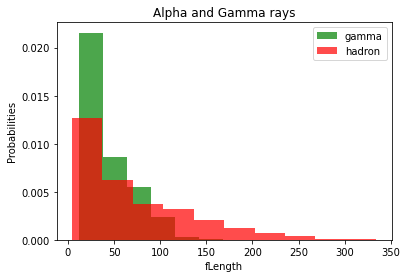

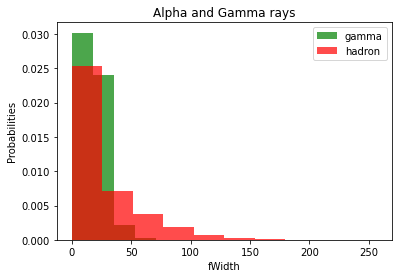

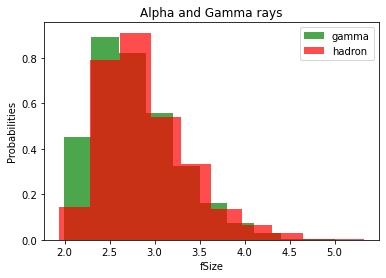

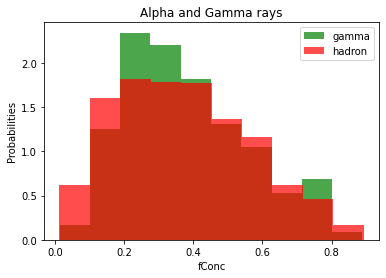

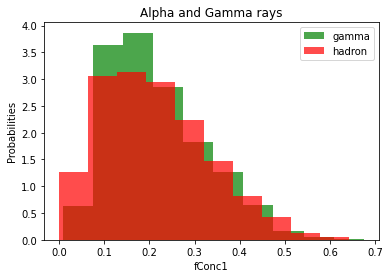

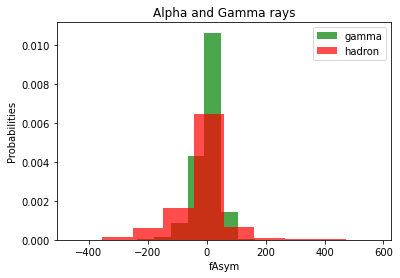

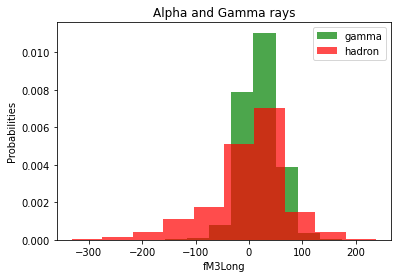

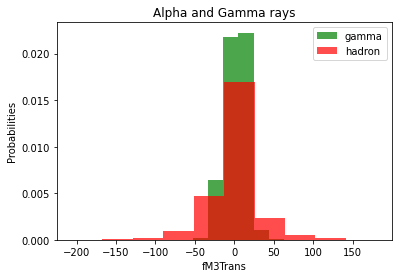

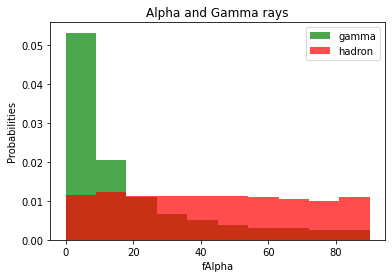

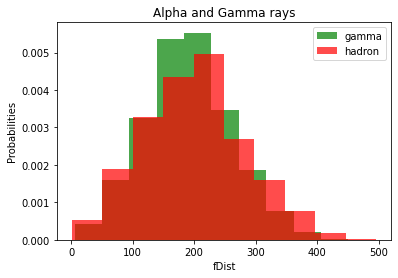

In [ ]:
for label in cols[:-1]:
  plt.hist(df[df['class']==1][label], color= 'green', density=True, alpha = 0.7, label='gamma')
  plt.hist(df[df['class']==0][label], color = 'red', density= True, alpha = 0.7, label = 'hadron')
  plt.ylabel('Probabilities')
  plt.xlabel(label)
  plt.title('Alpha and Gamma rays')
  plt.legend()
  plt.show()

In [ ]:
train, valid, test = np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])

In [ ]:
a=(df.std()-df.mean())/df.std()
print(a)
print(a['fLength']*df.head(n=1).values)
print(a)

fLength    -0.256942
fWidth     -0.209032
fSize      -4.977624
fConc      -1.080414
fConc1     -0.942409
fAsym       1.073164
fM3Long     0.793225
fM3Trans    0.988010
fAlpha     -0.059076
fDist      -1.593515
class      -0.357867
dtype: float64
[[ -7.39907382  -4.11160721  -0.67958517  -0.10066977  -0.05092585
   -7.11738861  -5.65554435   2.1076159  -10.30130771 -21.03910803
   -0.25694173]]
fLength    -0.256942
fWidth     -0.209032
fSize      -4.977624
fConc      -1.080414
fConc1     -0.942409
fAsym       1.073164
fM3Long     0.793225
fM3Trans    0.988010
fAlpha     -0.059076
fDist      -1.593515
class      -0.357867
dtype: float64


In [ ]:
print("Before Normalization \n")
x = df[df.columns[:-1]].values
z = x
y = df[df.columns[-1]].values
print(x)
print("\nAfter Normalization\n")
scaler = StandardScaler()
print(scaler.fit_transform(z))
print('\nManual Normaliztion')
for i in x:
  for j in i:
    j = j*((df.std()-df.mean())/df.std())
    print(j)
  break

Before Normalization 

[[ 28.7967  16.0021   2.6449 ...  -8.2027  40.092   81.8828]
 [ 31.6036  11.7235   2.5185 ...  -9.9574   6.3609 205.261 ]
 [162.052  136.031    4.0612 ... -45.216   76.96   256.788 ]
 ...
 [ 75.4455  47.5305   3.4483 ...  -9.4662  30.2987 256.5166]
 [120.5135  76.9018   3.9939 ... -63.8389  84.6874 408.3166]
 [187.1814  53.0014   3.2093 ...  31.4755  52.731  272.3174]]

After Normalization

[[-0.57722602 -0.33680419 -0.38113037 ... -0.40584194  0.47681587
  -1.49786555]
 [-0.51096889 -0.57002666 -0.64859479 ... -0.49009359 -0.81541816
   0.15312459]
 [ 2.56827756  6.20585836  2.61578306 ... -2.18302986  1.88922413
   0.84263513]
 ...
 [ 0.52392318  1.38177927  1.31887687 ... -0.4665087   0.10163583
   0.83900338]
 [ 1.58775746  2.98278123  2.47337518 ... -3.07720555  2.18525981
   2.87032093]
 [ 3.16145936  1.67999288  0.81314905 ...  1.49930076  0.96101431
   1.05044239]]

Manual Normaliztion
fLength      -7.399074
fWidth       -6.019427
fSize      -143.339141
f

In [ ]:
df.mean()

fLength      53.250154
fWidth       22.180966
fSize         2.825017
fConc         0.380327
fConc1        0.214657
fAsym        -4.331745
fM3Long      10.545545
fM3Trans      0.249726
fAlpha       27.645707
fDist       193.818026
class         0.648370
dtype: float64

In [ ]:
def scale_dataset(df, oversample = False):
  x = df[df.columns[:-1]].values
  y = df[df.columns[-1]].values
  scalar = StandardScaler()
  x= scalar.fit_transform(x)
  if oversample:
    ros = RandomOverSampler()
    x,y = ros.fit_resample(x,y)
  data = np.hstack((x,np.reshape(y,(-1,1))))
  return data, x, y

In [ ]:
print(len(train[train['class']==1]))
len(train[train['class']==0])

7326


4086

In [ ]:
train, x_train, y_train = scale_dataset(pd.DataFrame(train), oversample= True)
valid, x_valid, y_valid = scale_dataset(pd.DataFrame(valid),oversample= False)
test, x_test, y_test = scale_dataset(pd.DataFrame(test), oversample = False)

In [ ]:
sum(y_train==1)

NameError: ignored



```
# K Nearest Nieghbours
```



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 9)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [ ]:
print(y_test)
x1=knn.predict(x_test)



[1 1 1 ... 0 1 0]


In [ ]:
print(classification_report(y_test,x1))

              precision    recall  f1-score   support

           0       0.74      0.76      0.75      1297
           1       0.88      0.86      0.87      2507

    accuracy                           0.83      3804
   macro avg       0.81      0.81      0.81      3804
weighted avg       0.83      0.83      0.83      3804



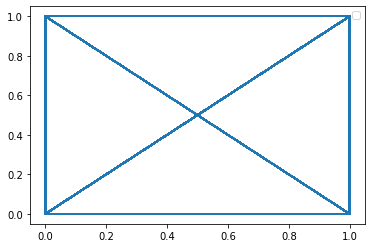

In [ ]:
plt.plot(x1,y_test)
plt.legend()
plt.show()


Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
naive = GaussianNB()
naive.fit(x_train,y_train)

GaussianNB()

In [ ]:
y_pred=naive.predict(x_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.66      0.40      0.50      1297
           1       0.74      0.89      0.81      2507

    accuracy                           0.73      3804
   macro avg       0.70      0.65      0.66      3804
weighted avg       0.71      0.73      0.70      3804



Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(x_train,y_train)

LogisticRegression()

In [ ]:
Y= reg.predict(x_test)
print(classification_report(y_test,Y))

              precision    recall  f1-score   support

           0       0.66      0.72      0.69      1297
           1       0.85      0.80      0.83      2507

    accuracy                           0.78      3804
   macro avg       0.75      0.76      0.76      3804
weighted avg       0.78      0.78      0.78      3804



State Vector Machine

In [ ]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(x_train,y_train)



SVC()

In [ ]:
s = svm.predict(x_test)
print(classification_report(y_test,s))

              precision    recall  f1-score   support

           0       0.79      0.82      0.80      1297
           1       0.90      0.88      0.89      2507

    accuracy                           0.86      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.86      0.86      0.86      3804



Neural Networks